In [15]:
from pandas import read_csv
import pandas as pd

In [300]:
data =read_csv('data_final.csv', usecols=['time', 'rgdp'])

In [301]:
data.sort_values(by='time', inplace=True)
# data
data['time'] = ['{}-1-1'.format(x) for x in data['time']]

In [302]:
import matplotlib.pyplot as plt

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


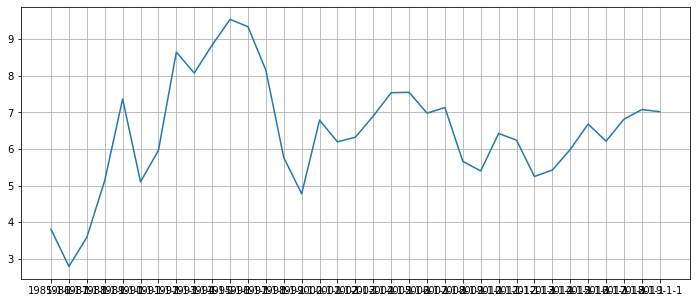

In [303]:
plt.plot(data['time'].values, data['rgdp'].values)
plt.grid()

In [304]:
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'], format='%Y-%m-%d')


In [305]:
data.tail()

,ds,y
4,2015-01-01,6.679289
3,2016-01-01,6.210812
2,2017-01-01,6.812246
1,2018-01-01,7.075789
0,2019-01-01,7.017435


In [306]:
from fbprophet import Prophet
model = Prophet()
model.fit(data.iloc[:-6, :])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [307]:
from pandas import DataFrame
future = list()
for i in range(1985, 2020):
	date = '{}-1-1'.format(i)
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'], format='%Y-%m-%d')
future

,ds
0,1985-01-01
1,1986-01-01
2,1987-01-01
3,1988-01-01
4,1989-01-01
5,1990-01-01
6,1991-01-01
7,1992-01-01
8,1993-01-01
9,1994-01-01


In [308]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1985-01-01,5.923512,3.921037,8.134430
1,1986-01-01,6.039879,4.222854,8.283974
2,1987-01-01,6.196075,4.132563,8.361668
3,1988-01-01,6.391938,4.353388,8.598069
4,1989-01-01,6.020711,3.845404,8.132636
5,1990-01-01,6.137078,4.041734,8.160245
6,1991-01-01,6.293274,4.093945,8.329291
7,1992-01-01,6.489138,4.331210,8.550443
8,1993-01-01,6.117911,3.957133,8.220969
9,1994-01-01,6.234278,4.203729,8.363073


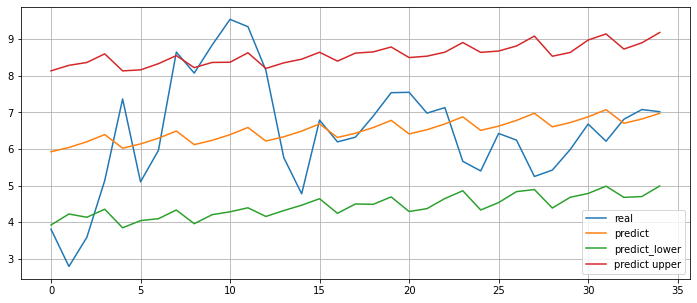

In [309]:
plt.plot(data['y'].values, label='real')
plt.plot(forecast['yhat'], label='predict')
plt.plot(forecast['yhat_lower'], label='predict_lower')
plt.plot(forecast['yhat_upper'], label='predict upper')
plt.grid()
plt.legend()

In [270]:
data = read_csv('data_final.csv')
data.sort_values(by='time', inplace=True)
lag = 1
data.head()

,time,rgdp,cpi,aff,manu,m2
34,1985,3.805856,0.382889,0.492997,0.563543,0.393517
33,1986,2.789292,0.382889,0.492997,0.563543,0.393517
32,1987,3.583470,0.382889,0.492997,0.563543,0.393517
31,1988,5.135012,0.382889,0.492997,0.563543,0.393517
30,1989,7.364513,0.382889,0.492997,0.563543,0.393517


In [271]:
def create_dataset(data, lag=1):
  data_X, data_y = [], []
  for i in range(lag, len(data)):
    pre = data.iloc[i - lag:i, :].values
    data_X.append(pre.flatten())
    data_y.append(data.iloc[i, 0])
  return [list(x) for x in data_X], data_y


In [272]:
X, y = create_dataset(data.iloc[:, 1:], lag)

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2)
len(X_train[0])

5

In [274]:
import pandas
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [295]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for i in range(1):
    
  # model defined
  model = Sequential()
  # model.add(Dense(8, input_dim=5 * lag, activation='relu'))
  # model.add(Dropout(0.2))
  model.add(Dense(1, use_bias=True))
  model.compile(optimizer='rmsprop',  loss = root_mean_squared_error)
  model.fit(X_train, y_train, epochs=260, batch_size=4, verbose=0)

  print(i, '::>',root_mean_squared_error(y_test, model.predict(X_test).squeeze()))

0 ::> tf.Tensor(0.563169219295497, shape=(), dtype=float64)


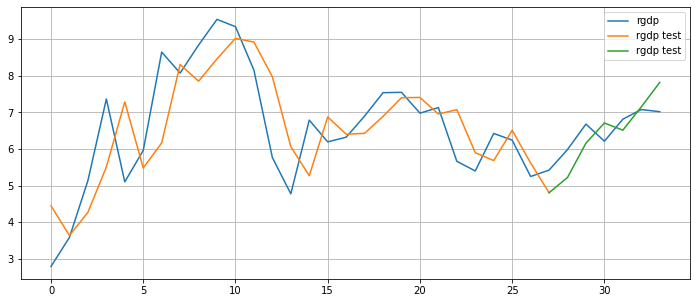

<tf.Tensor: shape=(), dtype=float64, numpy=0.563169219295497>

In [296]:
plt.rcParams["figure.figsize"] = (12,5)

model.predict(X_test)
real = list(y_train) + list(y_test)
predict = model.predict(X).flatten().tolist()
predict_train = [None] * len(predict)
predict_test = [None] *len(predict) 
predict_train[:len(X_train) + 1] = predict[: len(X_train) + 1]
predict_test[len(X_train):] = predict[len(X_train):]
# plt.plot(predict_train, label='rgdp train')
plt.plot(real, label='rgdp')
plt.plot(predict_train, label='rgdp test')
plt.plot(predict_test, label='rgdp test')
plt.grid()

plt.legend()
plt.show()
root_mean_squared_error(y_test, model.predict(X_test).squeeze())

In [297]:
for x, y in zip(y_test, model.predict(X_test).squeeze().tolist()):
  print(x, ':\t', y)

5.42188299130713 :	 4.802999973297119
5.9836546369785095 :	 5.220606327056885
6.67928878891428 :	 6.158000946044922
6.21081166789992 :	 6.708425998687744
6.8122456596398 :	 6.513554096221924
7.07578861674985 :	 7.148849964141846
7.017434882187799 :	 7.818023681640625
